In [86]:
import numpy as np
import pandas as pd
import seaborn as sns
import requests
from urllib.parse import urlencode

import warnings
warnings.filterwarnings('ignore')

In [87]:
df_customers = pd.read_csv('olist_customers_dataset.csv')
# создаем таблицу df_customers с данными о покупателях
df_orders = pd.read_csv('olist_orders_dataset.csv', parse_dates=['order_purchase_timestamp','order_approved_at','order_delivered_carrier_date','order_delivered_customer_date','order_estimated_delivery_date'])
# создаем таблицу df_orders с данными о покупках
df_items = pd.read_csv('olist_order_items_dataset.csv', parse_dates=['shipping_limit_date'])
# создаем таблицу df_items с данными о товарах в чеке

In [88]:
df_customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [89]:
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


In [90]:
df_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


------
Проверка данных датафрейма olist_customers_dataset.csv


In [91]:
df_customers.head(2)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP


In [92]:
# определяю размер датафрейма
df_customers.shape 

(99441, 5)

In [93]:
# проверяю на тип данных. Оставляю всё как есть, расхождений не выявил
df_customers.dtypes

customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object

In [94]:
# проверяю на пропущенные значения Nan
df_customers.isna().all()

customer_id                 False
customer_unique_id          False
customer_zip_code_prefix    False
customer_city               False
customer_state              False
dtype: bool

Проверка данных датафрейма olist_orders_datase.csv


In [95]:
df_orders.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13


In [96]:
df_orders.shape

(99441, 8)

In [97]:
df_orders.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object

In [98]:
# Нахожу Nan значения. Но судя по смыслу данных, это могут оказаться не битые или ошибочные значения,
# а просто пропущенные ячейки, если заказ не был выполнен до конца
df_orders.notna().all()

order_id                          True
customer_id                       True
order_status                      True
order_purchase_timestamp          True
order_approved_at                False
order_delivered_carrier_date     False
order_delivered_customer_date    False
order_estimated_delivery_date     True
dtype: bool

In [99]:
df_orders.order_approved_at.value_counts(dropna=False).head(2)
# Нахожу обозначение nan в столбце и количество, это 'NaT'

NaT                    160
2018-02-27 04:31:10      9
Name: order_approved_at, dtype: int64

In [100]:
df_orders.order_delivered_carrier_date.value_counts(dropna=False).head(2)
# Нахожу обозначение nan в столбце и количество, это 'NaT'

NaT                    1783
2018-05-09 15:48:00      47
Name: order_delivered_carrier_date, dtype: int64

In [101]:
df_orders.order_delivered_customer_date.value_counts(dropna=False).head(2)
# Нахожу обозначение nan в столбце и количество, это 'NaT'

NaT                    2965
2018-02-14 21:09:19       3
Name: order_delivered_customer_date, dtype: int64

In [102]:
# хочу выяснить, нет ли ошибок в датах, нет ли такого, что дата из более позднего столбца идет по хронологии раньше чем 
# из предыдущего столбца ПРОВЕРКА №1 разницы между order_purchase_timestamp и order_approved_at
df_prov = df_orders[:] # копирую датафрейм. Создаю новый грязный датафрейм чтобы не добавлять колонки в исходный
df_prov['proverka_1sub2'] = df_prov.order_purchase_timestamp-df_prov.order_approved_at # создаю столбец с разницей
df_prov = df_prov.dropna(axis='index', how='any') # выкидываю строки с NaT значения, тк в дальнейшем строки создают ошибки
df_prov.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,proverka_1sub2
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,-1 days +23:49:18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,-2 days +17:17:10


In [103]:
ss = df_prov['proverka_1sub2'].astype('int64')>0 # перевожу разницу из timedelta в int. И, поскольку, я вычитал из меньшего
# большее, то timedelta с отрицательным значением будет иметь правильный хронологический порядок

In [104]:
ss.unique() # значений больше 0 не обнаружено. Значит все временные данные из соседних столбцов идут в правильном
# хронологическом порядке, ошибок не обнаружено

array([False])

In [105]:
# по аналогии из предыдущей проверки 
# ПРОВЕРКА №2 разницы между order_approved_at и order_delivered_carrier_date
df_prov['proverka_2sub3'] = df_prov.order_approved_at-df_prov.order_delivered_carrier_date # создаю столбец с разницей
df_prov.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,proverka_1sub2,proverka_2sub3
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,-1 days +23:49:18,-3 days +15:12:15
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,-2 days +17:17:10,-1 days +12:53:27


In [106]:
ss2 = df_prov['proverka_2sub3'].astype('int64')>0 # применяю тот же алгоритм, что и при придыдущем сравнении
ss2.unique() # обнаруженны несоответсвия

array([False,  True])

In [107]:
ss2[ss2 > 0] # обнаруженно 1350 строк с датами в неправильном порядке, пока не знаю с чем это связано

15       True
64       True
199      True
210      True
415      True
         ... 
99091    True
99230    True
99266    True
99377    True
99406    True
Name: proverka_2sub3, Length: 1350, dtype: bool

In [108]:
df_prov.sort_values('proverka_2sub3', ascending=False).head() 
# если данные верны то 1350 заказов были переданы в логистическую службу еще до того как они были оплачены, возможно 
# нужно принять это за норму
# встречается одна аномалия с чеком 7c48bb55e8e4f7e56d412e9653db37bc где явная ошибка написания месяца
# вместо 07 указано 01, что привело к разнице в 171 день

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,proverka_1sub2,proverka_2sub3
25883,7c48bb55e8e4f7e56d412e9653db37bc,34ef6181341eb36c47fd601c46878f00,delivered,2018-07-16 18:40:53,2018-07-16 18:50:22,2018-01-26 13:35:00,2018-07-23 20:04:45,2018-08-07,-1 days +23:50:31,171 days 05:15:22
14562,1fab4ac9d85079b3da72a11475ae1685,f831c1fa80308975ec2b58e4877328e0,delivered,2017-09-01 19:04:22,2017-09-13 22:06:11,2017-09-04 13:10:23,2017-09-08 20:13:03,2017-09-20,-13 days +20:58:11,9 days 08:55:48
46163,0184d4ddb259e1a4cfc2871888cf97b8,09425ea1839abf2f0d289a0ff453fa21,delivered,2017-09-01 20:04:28,2017-09-13 22:17:15,2017-09-04 14:05:50,2017-09-09 15:12:44,2017-09-20,-13 days +21:47:13,9 days 08:11:25
98710,1378f9601350615613cc8832d6789c5d,988126b4ddf725d9724e4318872ea2ae,delivered,2017-09-01 20:28:02,2017-09-13 22:03:51,2017-09-04 18:07:55,2017-09-13 22:24:46,2017-09-29,-13 days +22:24:11,9 days 03:55:56
41592,8554cb37f7158cb0b082a841d24a4589,788e845925ff64c9df5d8ba40e28cf50,delivered,2017-09-01 18:40:44,2017-09-13 21:58:04,2017-09-04 19:12:19,2017-09-08 20:07:45,2017-10-02,-13 days +20:42:40,9 days 02:45:45


In [109]:
# по аналогии с предыдущей проверкой 
# ПРОВЕРКА №3 разницы между order_delivered_carrier_date и order_delivered_customer_date
df_prov['proverka_3sub4'] = df_prov.order_delivered_carrier_date-df_prov.order_delivered_customer_date 
# создаю столбец с разницей
df_prov.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,proverka_1sub2,proverka_2sub3,proverka_3sub4
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,-1 days +23:49:18,-3 days +15:12:15,-7 days +22:29:47
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,-2 days +17:17:10,-1 days +12:53:27,-13 days +23:03:15


In [110]:
ss3 = df_prov['proverka_3sub4'].astype('int64')>0 # применяю тот же алгоритм, что и при придыдущем сравнении
ss3.unique() # обнаруженны несоответсвия

array([False,  True])

In [111]:
ss3[ss3 > 0].shape # обнаруженно 23 строки с датами в неправильном порядке, пока не знаю с чем это связано

(23,)

In [112]:
df_prov.sort_values('proverka_3sub4', ascending=False).head() 
# если данные верны то 23 заказа были доставленны еще до того как были переданны в логистическую службу, ошибки ли это
# или нет, пока невозможно определить (может эти заказы делали сами сотрудники компаний, и доставки не требовались)
# встречается одна анамалия с чеком c1e2bf2b7dd3309f2f5356c6b63968fa, разница слишком выделяется на фоне других

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,proverka_1sub2,proverka_2sub3,proverka_3sub4
34939,c1e2bf2b7dd3309f2f5356c6b63968fa,e37d47e7eec62f08dc5deecc7d5532d6,delivered,2017-02-10 10:19:10,2017-02-10 10:30:13,2017-03-02 17:34:26,2017-02-14 15:15:57,2017-03-15,-1 days +23:48:57,-21 days +16:55:47,16 days 02:18:29
27470,fa3e37584f4fdb1ded0e0de700dfcb4e,63be4feff10a0b1d85f2cfbf10df9754,delivered,2017-07-30 19:32:23,2017-07-30 19:45:09,2017-08-09 18:18:43,2017-08-01 21:13:01,2017-08-18,-1 days +23:47:14,-10 days +01:26:26,7 days 21:05:42
45302,29941903985f944b0ffc49c479c1547d,b56ee98181afc3948a758d73a08423de,delivered,2017-05-29 16:16:50,2017-05-29 16:25:16,2017-06-09 15:07:29,2017-06-02 11:09:16,2017-06-23,-1 days +23:51:34,-11 days +01:17:47,7 days 03:58:13
14474,dceb62e8fa94b46006c9554fed743df0,2721900eb4e0f1cc2c836dd7bc1b1e11,delivered,2017-07-20 20:58:05,2017-07-22 11:45:11,2017-08-01 18:23:30,2017-07-26 18:09:10,2017-08-11,-2 days +09:12:54,-11 days +17:21:41,6 days 00:14:20
49933,76458889992169d3135b264dc13aec67,999196dca58a3db3d966d8f148532010,delivered,2016-10-07 10:05:16,2016-10-07 11:24:43,2016-10-26 11:43:06,2016-10-20 18:03:17,2016-11-29,-1 days +22:40:33,-20 days +23:41:37,5 days 17:39:49


In [113]:
# Так же при выполнении одного из заданий обнаружил, что еще 23 заказаза имеют статус delivered несмотря то 
# имеют пропущенные значения, пропущенные значения разбросанны без системно, делаю вывод что это строки с ощибками
df_orders.query("order_status=='delivered' \
                and ( \
                order_purchase_timestamp=='NaT' or order_approved_at=='NaT' \
                or order_delivered_carrier_date=='NaT' or order_delivered_customer_date=='NaT' \
                )").head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
3002,2d1e2d5bf4dc7227b3bfebb81328c15f,ec05a6d8558c6455f0cbbd8a420ad34f,delivered,2017-11-28 17:44:07,2017-11-28 17:56:40,2017-11-30 18:12:23,NaT,2017-12-18
5323,e04abd8149ef81b95221e88f6ed9ab6a,2127dc6603ac33544953ef05ec155771,delivered,2017-02-18 14:40:00,NaT,2017-02-23 12:04:47,2017-03-01 13:25:33,2017-03-17
16567,8a9adc69528e1001fc68dd0aaebbb54a,4c1ccc74e00993733742a3c786dc3c1f,delivered,2017-02-18 12:45:31,NaT,2017-02-23 09:01:52,2017-03-02 10:05:06,2017-03-21
19031,7013bcfc1c97fe719a7b5e05e61c12db,2941af76d38100e0f8740a374f1a5dc3,delivered,2017-02-18 13:29:47,NaT,2017-02-22 16:25:25,2017-03-01 08:07:38,2017-03-17
20618,f5dd62b788049ad9fc0526e3ad11a097,5e89028e024b381dc84a13a3570decb4,delivered,2018-06-20 06:58:43,2018-06-20 07:19:05,2018-06-25 08:05:00,NaT,2018-07-16


Проверка данных датафрейма olist_order_items_dataset.csv

In [114]:
df_items.head(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [115]:
df_items.shape

(112650, 7)

In [116]:
df_items.dtypes

order_id                       object
order_item_id                   int64
product_id                     object
seller_id                      object
shipping_limit_date    datetime64[ns]
price                         float64
freight_value                 float64
dtype: object

In [117]:
df_items.notna().all()

order_id               True
order_item_id          True
product_id             True
seller_id              True
shipping_limit_date    True
price                  True
freight_value          True
dtype: bool

Предварительная проверка данных на ошибки закончена
_______________

**В ходе решения всех заданий я пришел в выводу, что за покупку нужно считать уникальную значение order_id для которого выполняются условия: статус заказа processing или shipped или delivered, и должна имется отметка со временем в столбце order_approved_at.
    В начале у меня было немного другое мнение о покупки, так что если в решении ранних задач покупка будет определятся по другому, значит я просмотрел, хотя пытался всё перепроверить**

**Задание 1. Сколько у нас пользователей, которые совершили покупку только один раз?**

In [118]:
# СПОСОБ 1
# Для решения задания 1 мне нужно посчитать количество customer_unique_id которые встречались только 1 раз, и имеют 
# завершенный статус заказа delivered
# Для этого я мерджу два датафрейма по общиму столбцу customer_id
zad1 = df_customers.merge(df_orders, how='inner', on='customer_id')
# После отфильтровываю статус заказов по условию "что считать покупокй" и удаляю из customer_unique_id все дубли, 
# в том числе и первое значение. И считаю количество оставшихся уникальных значений.
zad1.query("order_status=='processing' or order_status=='shipped' or order_status=='delivered'") \
    .dropna(axis='index', how='any', subset=['order_approved_at']) \
    .drop_duplicates(subset='customer_unique_id', keep=False).customer_unique_id.nunique()

91802

In [119]:
# СПОСОБ 2
# Из cмердженой и отфильтрованой по "что считать покупокй" таблицы делаю сортировку по количеству значений, 
# и оставляю только строки с 1 значением
bb = zad1.query("order_status=='processing' or order_status=='shipped' or order_status=='delivered'") \
    .dropna(axis='index', how='any', subset=['order_approved_at']).customer_unique_id.value_counts()
# Не знаю как сделать за одно действие, подскажите
bb[bb==1]

5db64889ffdba48449cb50f6566a2e28    1
283fa782044034a172e6ea79a0de0eae    1
fcabb1c1914da0aff9378a59942ff133    1
49408479eded405b1623faad5a5e9403    1
52ba13556336e0643d5af3b1a94ea82b    1
                                   ..
1c0b80f13c209893ef36ff95cc2041c1    1
4a50febfa20fe1d1eb876184fff809fe    1
c085cb83e3a5dcbd259c2212337faf28    1
d3976879e2fea1d376aec5fcf62b07a6    1
0a8c1dca34c99bbb023b3b1b09735bfa    1
Name: customer_unique_id, Length: 91802, dtype: int64

**Задание 1. Ответ: 91802 пользователей совершили покупку только один раз**
_________________

-------------------------------------------------------
**Задания 2. Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)?**

In [120]:
df_orders.head() # Беру второй датафрейм

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


In [121]:
df_orders.order_status.value_counts() # Смотрю количество уникальных значения статуса доставки

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

In [122]:
# Делаю предположение, что еще не доставленные товары, но находящиеся в процессе покупки, нельзя считать недоставленными
# Поэтому за недоставленные определяю заказы со статусом unavailable и canceled 

-----------------------------------------
Статус "canceled"

In [123]:
# Отфильтровываю датафрейм по статусу заказа canceled и пропушенным значениям в столбцах со временем
df_orders.query("order_status=='canceled' \
                and ( \
                order_purchase_timestamp=='NaT' or order_purchase_timestamp=='NaT' or order_approved_at=='NaT' \
                or order_delivered_carrier_date=='NaT' or order_delivered_customer_date=='NaT' \
                )").head(5)
# Таких строк только 619, хотя должно быть 625

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
397,1b9ecfe83cdc259250e1a8aca174f0ad,6d6b50b66d79f80827b6d96751528d30,canceled,2018-08-04 14:29:27,2018-08-07 04:10:26,NaT,NaT,2018-08-14
613,714fb133a6730ab81fa1d3c1b2007291,e3fe72696c4713d64d3c10afe71e75ed,canceled,2018-01-26 21:34:08,2018-01-26 21:58:39,2018-01-29 22:33:25,NaT,2018-02-22
1058,3a129877493c8189c59c60eb71d97c29,0913cdce793684e52bbfac69d87e91fd,canceled,2018-01-25 13:34:24,2018-01-25 13:50:20,2018-01-26 21:42:18,NaT,2018-02-23
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaT,NaT,NaT,2018-09-12
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaT,NaT,NaT,2018-10-17


In [124]:
# Делаю дополнительную проверку без пропущенных значений Nan. Таких строк 6. 619 + 6 = 625. Все сошлось
df_orders.query("order_status=='canceled' \
                and ( \
                order_purchase_timestamp!='NaT' and order_purchase_timestamp!='NaT' and order_approved_at!='NaT' \
                and order_delivered_carrier_date!='NaT' and order_delivered_customer_date!='NaT' \
                )").head(5)
# Оказывается 6 заказов были отменены пройдя все стадии доставки. Либо же эти заказы были всё таки доставлены,
# но имеют ошибочный статус заказа canceled вместо delivered 

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
2921,1950d777989f6a877539f53795b4c3c3,1bccb206de9f0f25adc6871a1bcf77b2,canceled,2018-02-19 19:48:52,2018-02-19 20:56:05,2018-02-20 19:57:13,2018-03-21 22:03:51,2018-03-09
8791,dabf2b0e35b423f94618bf965fcb7514,5cdec0bb8cbdf53ffc8fdc212cd247c6,canceled,2016-10-09 00:56:52,2016-10-09 13:36:58,2016-10-13 13:36:59,2016-10-16 14:36:59,2016-11-30
58266,770d331c84e5b214bd9dc70a10b829d0,6c57e6119369185e575b36712766b0ef,canceled,2016-10-07 14:52:30,2016-10-07 15:07:10,2016-10-11 15:07:11,2016-10-14 15:07:11,2016-11-29
59332,8beb59392e21af5eb9547ae1a9938d06,bf609b5741f71697f65ce3852c5d2623,canceled,2016-10-08 20:17:50,2016-10-09 14:34:30,2016-10-14 22:45:26,2016-10-19 18:47:43,2016-11-30
92636,65d1e226dfaeb8cdc42f665422522d14,70fc57eeae292675927697fe03ad3ff5,canceled,2016-10-03 21:01:41,2016-10-04 10:18:57,2016-10-25 12:14:28,2016-11-08 10:58:34,2016-11-25


In [125]:
# Делаю очень сложную штуку, пытаюсь создать таблицу с детализацией количества Nan для canceled
zad2_canceled = df_orders[['order_status','order_purchase_timestamp','order_approved_at','order_delivered_carrier_date','order_delivered_customer_date']] \
                .query("order_status=='canceled' \
                and (( \
                order_purchase_timestamp=='NaT' or order_approved_at=='NaT' \
                or order_delivered_carrier_date=='NaT' or order_delivered_customer_date=='NaT' \
                ) or (\
                order_approved_at!='NaT' \
                and order_purchase_timestamp!='NaT' and order_delivered_carrier_date!='NaT' and order_delivered_customer_date!='NaT'))").isna().sum()
zad2_canceled

order_status                       0
order_purchase_timestamp           0
order_approved_at                141
order_delivered_carrier_date     550
order_delivered_customer_date    619
dtype: int64

In [126]:
# Получаю кривую, с детализацией по причинам
zad2_canceled.to_frame() # Перевожу в датафрейм 
# Но к сожалению с помощью функции sum nanы просто суммируются, и пропадает условия которые нужны для детализации,
# поэтому возвращаюсь на предыдущий шаг

,0
order_status,0
order_purchase_timestamp,0
order_approved_at,141
order_delivered_carrier_date,550
order_delivered_customer_date,619


In [127]:
# Делаю value_counts вместо sum, логические условия не пропадают
zad2_canceled_det = df_orders[['order_status','order_purchase_timestamp','order_approved_at','order_delivered_carrier_date','order_delivered_customer_date']] \
                .query("order_status=='canceled' \
                and (( \
                order_purchase_timestamp=='NaT' or order_approved_at=='NaT' \
                or order_delivered_carrier_date=='NaT' or order_delivered_customer_date=='NaT' \
                ) or (\
                order_purchase_timestamp!='NaT' and order_approved_at!='NaT' \
                and order_delivered_carrier_date!='NaT' and order_delivered_customer_date!='NaT'))").isna().value_counts()
zad2_canceled_det

order_status  order_purchase_timestamp  order_approved_at  order_delivered_carrier_date  order_delivered_customer_date
False         False                     False              True                          True                             409
                                        True               True                          True                             141
                                        False              False                         True                              69
                                                                                         False                              6
dtype: int64

In [128]:
zad2_canceled_det.to_frame() # Перевожу в датафрейм 

0
order_status order_purchase_timestamp order_approved_at order_delivered_carrier_date order_delivered_customer_date     
False        False                    False             True                         True                           409
                                      True              True                         True                           141
                                      False             False                        True                            69
                                                                                     False                            6

**Промежуточный вывод: заказы со статусом canceled не были доставленны изза остановки на разных стадиях**

* order_approved_at 141шт
* order_delivered_carrier_date 409шт
* order_delivered_customer_date 69шт
* еще 6 не были доставленны несмотря на то что прошли все стадии доставки, либо ошибочно имеют статус недоставленных

-----------------------------------------
Статус "unavailable"

In [129]:
# Отфильтровываю датафрейм по статусу заказа unavailable и пропушенным значениям в столбцах со временем. Количество строк 
# 609 совпало с изначальным, дополнительных изысканий и условий не требуется, можно применять метод sum
zad2_unavailable = df_orders[['order_status','order_purchase_timestamp','order_approved_at','order_delivered_carrier_date','order_delivered_customer_date']]\
                .query("order_status=='unavailable' \
                and ( \
                order_purchase_timestamp=='NaT' or order_approved_at=='NaT' \
                or order_delivered_carrier_date=='NaT' or order_delivered_customer_date=='NaT' \
                )").isna().sum()
zad2_unavailable

order_status                       0
order_purchase_timestamp           0
order_approved_at                  0
order_delivered_carrier_date     609
order_delivered_customer_date    609
dtype: int64

In [130]:
zad2_unavailable.to_frame() # Перевожу в датафрейм

,0
order_status,0
order_purchase_timestamp,0
order_approved_at,0
order_delivered_carrier_date,609
order_delivered_customer_date,609


**Промежуточный вывод: все заказы со статусом unavailable не были доставленны изза остановки на стадии order_delivered_carrier_date 609шт**

---------------------------------------------
Подсчет среднего. Для этого сначала определяю общий временной интервал как от даты первого созданного заказа до 
даты последнего созданного заказа по столбцу order_purchase_timestamp 

In [131]:
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


In [132]:
df_orders.order_purchase_timestamp.min()

Timestamp('2016-09-04 21:15:19')

In [133]:
df_orders.order_purchase_timestamp.max()

Timestamp('2018-10-17 17:30:18')

In [134]:
# Врменной интервал составляет 24 полных месяца
# Для неполных посчитаю дополнительные дробные части
# Для сентября с 4 числа
print((30-4)/30)
# Для октября до 17 числа 
print(17/31)

0.8666666666666667
0.5483870967741935


In [135]:
time_delta = (24 + 0.87 + 0.55)
time_delta # временной интервал между первым и последним заказом в месяцах

25.42

In [136]:
fail_orders = df_orders.query("order_status=='canceled' or order_status=='unavailable'").order_status.count() 
# общее количество недоставленных
fail_orders

1234

In [137]:
mean_fail_orders = (fail_orders/time_delta).round(2)
mean_fail_orders

48.54

**Задание 2. Ответ: в среднем в месяц не доставляется 48.54 заказа.
    За весь отчетный период заказы не были доставленны по следующим причинам:**
* 141 шт был отменен сразу после его создания,
* 409 шт были отменены после подтверждения оплаты,
* 69 шт были отменены после передачи в логистическую службу,
* 6 шт были отменены после доставки либо это ошибка в статусе заказа, и на самом деле они доставленны и могут быть исключенны из этого списка,
* 609 шт стали недоступны на стадии передачи в логистическую службу.
__________
    

-----------------------
**Задание 3. По каждому товару определить, в какой день недели товар чаще всего покупается.**

Определяю днем покупки тот день когда покупателем был оплачен выставленный счет т.е. колонка order_approved_at из второго датафрейма. 
Всю последующую логистику и доставку рассматриваю как отдельную услугу.
Так же статус заказа с товаром должен иметь статусы processing\shipped\delivered\unavailable.
unavailable оказывается в этом списке, т.к. никаких указаний о возврате средств при этом статусе не имеется.

In [138]:
df_items.head(2) # вывожу датафрейм с айди товаров

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93


In [139]:
df_orders.head(2) # вывожу датафрейм с чеками

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13


In [140]:
df_zad3 = df_orders.merge(df_items, how='inner', on='order_id') # Мерджу два датафрейма по общей колонке

In [141]:
df_zad3['order_approved_at'] = df_zad3.order_approved_at.dt.day_name() # Перевожу дату из колонки order_approved_at 
# в день недели 
df_zad3.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,Monday,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,Thursday,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,Wednesday,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,Saturday,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,Tuesday,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72


In [142]:
df_zad3.order_approved_at.isna().sum() 
# т.к из предудщих заданий я знаю что на этой стадии order_approved_at встречались пропущенные значения nan делаю проверку

15

In [143]:
df_zad3 = df_zad3.dropna(how='all', subset=['order_approved_at'])
# удаляю эти строки, в данный момент нас не интересует судьба этих заказов, важен лишь не совершенный факт оплаты покупки

In [144]:
# Создаю новый датафрейм с информацией о покупках каждого товара по дням
products_max = df_zad3.query("order_status=='processing' or order_status=='shipped' or order_status=='delivered'") \
    .groupby(['product_id','order_approved_at'], as_index=True) \
    .agg({'order_approved_at':'count'})
products_max.head()

order_approved_at
product_id                       order_approved_at                   
00066f42aeeb9f3007548bb9d3f33c38 Sunday                             1
00088930e925c41fd95ebfe695fd2655 Tuesday                            1
0009406fd7479715e4bef61dd91f2462 Friday                             1
000b8f95fcb9e0096488278317764d19 Friday                             1
                                 Wednesday                          1

In [145]:
products_max = products_max.rename(columns={'order_approved_at':'counts'}) # переименовываю столбец
products_max = products_max.reset_index() # сбрасываю индексы
products_max.head()

,product_id,order_approved_at,counts
0,00066f42aeeb9f3007548bb9d3f33c38,Sunday,1
1,00088930e925c41fd95ebfe695fd2655,Tuesday,1
2,0009406fd7479715e4bef61dd91f2462,Friday,1
3,000b8f95fcb9e0096488278317764d19,Friday,1
4,000b8f95fcb9e0096488278317764d19,Wednesday,1


In [146]:
products_max = products_max.sort_values('counts', ascending=False).drop_duplicates(['product_id'])
# сортирую по количеству покупок, чтобы на верхней строчке для каждого товара был самый популярный день по кол-ву покупок
# потом удаляю дубликаты каждого товара, остается только день с максимальным значением.
products_max.head()

,product_id,order_approved_at,counts
40699,aca2eb7d00ea1a7b8ebd4e68314663af,Tuesday,119
19963,53b36df67ebb7c41585e8d54d6772e08,Tuesday,105
15791,422879e10f46682990de24d770e7f83d,Tuesday,89
36222,99a4788cb24856965c36a24e339b6058,Tuesday,82
12952,368c6c730842d78016ad823897a372db,Thursday,80


In [147]:
products_max = products_max.drop(columns=['counts']) # удаляю столбец с counts
products_max.head()

,product_id,order_approved_at
40699,aca2eb7d00ea1a7b8ebd4e68314663af,Tuesday
19963,53b36df67ebb7c41585e8d54d6772e08,Tuesday
15791,422879e10f46682990de24d770e7f83d,Tuesday
36222,99a4788cb24856965c36a24e339b6058,Tuesday
12952,368c6c730842d78016ad823897a372db,Thursday


In [148]:
products_max.product_id.nunique() # проверка на кол-во уникальных товаров


32611


**Задание 3. Ответ: в датафрейме products_max отображена информация с самым популярным днем покупки для каждого товара**
_________


-----------------------------
**Задание 4. Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)?**

Так же как и в прошлом задании определяю за покупку оплаченный выставлееный счет, т.е. отметку в столбце order_approved_at, с учетом тех же статусов.
Далее для каждого пользователя мне нужно найти количество покупок в каждом месяце, и для каждого месяца расчитать среднее кол-во покупок в неделю.
Временной период датафрейма для этого задания определяю как от первого оплаченного заказа в столбце order_approved_at до последнего.

In [149]:
df_zad4 = df_customers.merge(df_orders, how='inner', on='customer_id') # мерджу первый и второй датафрейм
df_zad4.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15


In [150]:
df_zad4.query("order_status=='processing' or order_status=='shipped' or order_status=='delivered'").order_approved_at.isna().sum()
# обнаруженно 14 заказов со статусами подтвержденной покупки, но с отсутствием отметки об подтверждении платежа

14

In [153]:
# избавляюсь от этих строк, т.к. информация об оплате отсутствует
df_zad4 = df_zad4.query("order_status=='processing' or order_status=='shipped' or order_status=='delivered'") \
    .dropna(axis='index', how='any', subset=['order_approved_at'])
# фильтрую и оставляю только строки с совершенными покупками
df_zad4.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15


In [154]:
df_zad4.customer_unique_id.nunique() # считаю количество уникальных покупателей в таблице, для дальнейших сверок

94673

In [155]:
df_zad4.order_approved_at.min() # определяю стартовую дату 

Timestamp('2016-09-15 12:16:38')

In [156]:
df_zad4.order_approved_at.max() # определяю финальную дата

Timestamp('2018-09-03 17:40:06')

In [157]:
print((30-15)/7) # кол-во недель в стартовый неполный месяц 2016-09
print(3/7) # кол-во недель в финальный неполный месяц 2018-09
23 # кол-во полных месяцев за весь период
25 # всего месяцев

2.142857142857143
0.42857142857142855


25

In [158]:
df_zad4['order_approved_at'] = df_zad4['order_approved_at'].apply(lambda x: x.strftime('%Y-%m')) 
# оставляю только год и месяц в столбце покупки, удаляя день и время

In [159]:
df_zad4.order_approved_at.sort_values().nunique() # обнаруженно несоответствие в количестве месяцев

24

In [160]:
df_zad4.order_approved_at.sort_values().unique()
# обнаружил, что отсутствует месяц 2016-11, в этот месяц не было совершенно покупок
# я не буду брать этот месяц для подсчета, т.к. все результаты в нем будут равны 0

array(['2016-09', '2016-10', '2016-12', '2017-01', '2017-02', '2017-03',
       '2017-04', '2017-05', '2017-06', '2017-07', '2017-08', '2017-09',
       '2017-10', '2017-11', '2017-12', '2018-01', '2018-02', '2018-03',
       '2018-04', '2018-05', '2018-06', '2018-07', '2018-08', '2018-09'],
      dtype=object)

In [161]:
# создаю таблицу с количеством покупок для каждого покупателя по месяцам
orders_zad4 = df_zad4.groupby(['customer_unique_id','order_approved_at'], as_index=True) \
    .agg({'order_id':'count'})
orders_zad4.head()

,,order_id
customer_unique_id,order_approved_at,
0000366f3b9a7992bf8c76cfdf3221e2,2018-05,1
0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05,1
0000f46a3911fa3c0805444483337064,2017-03,1
0000f6ccb0745a6a4b88665a16c9f078,2017-10,1
0004aac84e0df4da2b147fca70cf8255,2017-11,1


In [162]:
orders_zad4 = orders_zad4.rename(columns={'order_id':'counts'}) # переименовываю столбец
orders_zad4 = orders_zad4.reset_index() # сбрасываю индексы

In [163]:
orders_zad4['weeks'] = pd.to_datetime(orders_zad4['order_approved_at']) # поскольку даты в столбце были отформатированны
# и сброшенны в тип object, возвращаю им тип datetime и создаю дополнитльный столбец для указания количества недель в месяце
orders_zad4['weeks'] = orders_zad4.weeks.dt.daysinmonth # функцией daysinmonth определяю количество дней в месяце

In [164]:
orders_zad4['weeks'] = (orders_zad4.weeks/7).round(2) # делю кол-во дней на 7 и определяю кол-во недель в месяце

In [165]:
orders_zad4 = orders_zad4.sort_values('order_approved_at') # сортирую датафрейм по датам

In [166]:
orders_zad4.loc[(orders_zad4.order_approved_at=='2016-09'), 'weeks'] = 2.14
orders_zad4.loc[(orders_zad4.order_approved_at=='2018-09'), 'weeks'] = 0.43
# вручную заменяю количество недель для первого и последнего неполных месяцев

In [167]:
orders_zad4.head()

,customer_unique_id,order_approved_at,counts,weeks
49536,830d5b7aaa3b6f1e9ad63703bec97d23,2016-09,1,2.14
88040,e93d7ba71f9edaa1360d2d16e8a95783,2016-10,1,4.43
12199,202fad4a680401564558b2cda0c5a8de,2016-10,1,4.43
51339,880e01d45fe9fdf7f417f37e55e7730f,2016-10,1,4.43
81091,d6a930873ee3f80aa823cb1d4baca58d,2016-10,1,4.43


In [168]:
orders_zad4['counts'] = (orders_zad4.counts/orders_zad4.weeks).round(2) 
# считаю количество покупок в неделю, как требует задание

In [169]:
orders_zad4.head()

,customer_unique_id,order_approved_at,counts,weeks
49536,830d5b7aaa3b6f1e9ad63703bec97d23,2016-09,0.47,2.14
88040,e93d7ba71f9edaa1360d2d16e8a95783,2016-10,0.23,4.43
12199,202fad4a680401564558b2cda0c5a8de,2016-10,0.23,4.43
51339,880e01d45fe9fdf7f417f37e55e7730f,2016-10,0.23,4.43
81091,d6a930873ee3f80aa823cb1d4baca58d,2016-10,0.23,4.43


In [170]:
zad4_svod = orders_zad4.pivot(index='customer_unique_id', columns=['order_approved_at','weeks'], values='counts')
# делаю сводную таблицу

In [172]:
zad4_svod.head()

order_approved_at,2016-09,2016-10,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,...,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09
weeks,2.14,4.43,4.43,4.43,4.00,4.43,4.29,4.43,4.29,4.43,...,4.43,4.43,4.00,4.43,4.29,4.43,4.29,4.43,4.43,0.43
customer_unique_id,,,,,,,,,,,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.23,NaN,NaN,NaN,NaN
0000b849f77a49e4a4ce2b2a4ca5be3f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.23,NaN,NaN,NaN,NaN
0000f46a3911fa3c0805444483337064,NaN,NaN,NaN,NaN,NaN,0.23,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0000f6ccb0745a6a4b88665a16c9f078,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0004aac84e0df4da2b147fca70cf8255,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [173]:
zad4_svod.notna().sum() # проверяю на Nan. Обнаруживается что в 2016-12 совершена всего одна покупка.

order_approved_at  weeks
2016-09            2.14        1
2016-10            4.43      273
2016-12            4.43        1
2017-01            4.43      706
2017-02            4.00     1665
2017-03            4.43     2583
2017-04            4.29     2305
2017-05            4.43     3556
2017-06            4.29     3143
2017-07            4.43     3820
2017-08            4.43     4196
2017-09            4.29     4160
2017-10            4.43     4431
2017-11            4.29     7140
2017-12            4.43     5697
2018-01            4.43     6999
2018-02            4.00     6441
2018-03            4.43     7131
2018-04            4.29     6689
2018-05            4.43     6944
2018-06            4.29     6101
2018-07            4.43     6052
2018-08            4.43     6506
2018-09            0.43        1
dtype: int64

In [174]:
zad4_svod = zad4_svod.fillna(0) # заменяю Nan на нули

In [175]:
zad4_svod.head()

order_approved_at,2016-09,2016-10,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,...,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09
weeks,2.14,4.43,4.43,4.43,4.00,4.43,4.29,4.43,4.29,4.43,...,4.43,4.43,4.00,4.43,4.29,4.43,4.29,4.43,4.43,0.43
customer_unique_id,,,,,,,,,,,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.23,0.0,0.0,0.0,0.0
0000b849f77a49e4a4ce2b2a4ca5be3f,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.23,0.0,0.0,0.0,0.0
0000f46a3911fa3c0805444483337064,0.0,0.0,0.0,0.0,0.0,0.23,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
0000f6ccb0745a6a4b88665a16c9f078,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
0004aac84e0df4da2b147fca70cf8255,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0


**Задание 4. Ответ: в датафрейм zad4_svod отображена информация по среднему количеству покупок в неделю, помесячно, для каждого уникального пользователя.
    Так же в процессе рещения были обнаруженны аномалии. За месяцы 2016-09, 2016-12, 2018-09 совершенно всего по одной покупке. В месяце 2016-11 вообще не было совершенно покупок**
_____

    

---------------------
**Задание 5. Используя pandas, проведи когортный анализ пользователей. В период с января по декабрь выяви когорту с самым высоким retention на 3й месяц.**

Решение:
1. Нужно сформировать 12 когорт, по месячно за 2017 год, в когорту попадает уникальный клиент который осуществил первую унилальную покупку в этот месяц.
2. Посчитать количество уникальных клиентов в каждой когорте
3. Для каждой когорты посчитать сколько клиентов повторно совершили покупки в 3 месяц. Месяц первой покупки считать за нулевой. (Пр: если январь - то апрель)
4. Посчитать Retention rate: в каждой когорте разделить кол-во клиентов в 3 месяце на кол-во в нулевом
5. Ответ: Посмотреть наибольший процент

In [176]:
df_customers.head(2) # беру первый датафрейм

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP


In [177]:
df_orders.head(2) # беру второй датафрейм

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13


In [178]:
df_zad5 = df_customers.merge(df_orders, how='inner', on='customer_id') # мерджу их

In [179]:
df_zad5 = df_zad5.drop(columns=['customer_zip_code_prefix','customer_city','customer_state']) # удаляю ненужные столбцы

In [180]:
df_zad5.head()

,customer_id,customer_unique_id,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15


In [181]:
# фильтрую и оставляю строки только с совершенными покупками
df_zad5 = df_zad5.query("order_status=='processing' or order_status=='shipped' or order_status=='delivered'") \
    .dropna(axis='index', how='any', subset=['order_approved_at'])

In [182]:
df_zad5.head(5)

,customer_id,customer_unique_id,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15


In [183]:
# группирую датафрейм по уник пользователям и нахожу для каждого дату первой покупки
df_zad5.groupby('customer_unique_id').agg(date_first = ('order_approved_at','min'))

,date_first
customer_unique_id,
0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 11:11:18
0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 18:25:44
0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03
0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:49:17
0004aac84e0df4da2b147fca70cf8255,2017-11-14 20:06:52
...,...
fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-08 21:15:16
fffea47cd6d3cc0a88bd621562a9d061,2017-12-10 20:16:20
ffff371b4d645b6ecea244b27531430a,2017-02-07 16:02:44


In [184]:
# тестирую самостоятельно нагугленную функцию transform, которая не будет создавать результирующий датафрейм
# а сразу вернет сагрегированный столбец в исходный
df_zad5['date_first'] = df_zad5.groupby('customer_unique_id')['order_approved_at'].transform(min)

In [185]:
df_zad5.head()

,customer_id,customer_unique_id,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,date_first
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,2017-05-16 15:22:12
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,2018-01-12 20:58:32
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,2018-05-20 16:19:10
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,2018-03-13 17:29:19
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,2018-07-29 10:10:09


In [186]:
df_zad5['cohort'] = df_zad5['date_first'].apply(lambda x: x.strftime('%Y-%m')) # из даты создаю имена для когорты

In [187]:
# первожу даты покупки в строковый вид, т.к. дальнейшие операции с датами типа дата вызывают у меня сложности и ошибки
df_zad5['purchase_month'] = df_zad5.order_approved_at.apply(lambda x: x.strftime('%Y-%m'))
# У меня не получается сравнивать даты в виде дат, при операции сравнений пандас просит вводить там всё вплоть до милисекунд
# Хотя мне нужно сравнить только месяцы и не более, объясните в реквесте как это делать правильно

In [188]:
df_zad5.head()

,customer_id,customer_unique_id,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,date_first,cohort,purchase_month
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,2017-05-16 15:22:12,2017-05,2017-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,2018-01-12 20:58:32,2018-01,2018-01
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,2018-05-20 16:19:10,2018-05,2018-05
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,2018-03-13 17:29:19,2018-03,2018-03
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,2018-07-29 10:10:09,2018-07,2018-07


In [189]:
# создаю массивы для названий когорт ==нулевых месяцев, и третьих месяцев
cohort_list = df_zad5.cohort.sort_values().unique()
cohort_month1_list = cohort_list[3:15]
cohort_month3_list = cohort_list[6:18]

In [190]:
cohort_month1_list # названия когорт ==нулевых месяцев

array(['2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06',
       '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12'],
      dtype=object)

In [191]:
cohort_month3_list # третьии месяцы

array(['2017-04', '2017-05', '2017-06', '2017-07', '2017-08', '2017-09',
       '2017-10', '2017-11', '2017-12', '2018-01', '2018-02', '2018-03'],
      dtype=object)

In [192]:
cohort_month1_value = [] # создаю пустой список для кол-ва покупателей в каждой когорте
for i in cohort_month1_list: 
    cohort_month1_value.append(df_zad5.query("cohort in @i").customer_unique_id.nunique())
# запускаю цикл перебора по когортам
# фильтрую датафрейм, оставляю только месяц с первой покупкой для каждой когорты, и считаю кол-во уникальных покупателей
# результат добавляю в список 

In [193]:
cohort_month3_value = [] # создаю пустой список для кол-ва покупателей 3 третий месяц в каждой когорте
for i, y in zip (cohort_month1_list, cohort_month3_list):
    cohort_month3_value.append(df_zad5.query("cohort in @i and purchase_month in @y").customer_unique_id.nunique())
# запускаю цикл перебора по когортам, беру когорту и покупки через 3 месяца
# фильтрую датафрейм по когорте и покупке в 3 месяц, если такое совпадение имеется, то пользователь из когорты
# совершил еще одну покупку через 3 месяца, всё это для уникальных значений
# результаты добавляю в список

In [194]:
cohort_month1_value # кол-во уникальных покупателей, когорты за каждый месяц

[705, 1661, 2577, 2286, 3527, 3102, 3770, 4136, 4082, 4345, 7021, 5577]

In [195]:
cohort_month3_value # кол-во уникальных покупателей которые повторно совершили покупку через 3 месяца после первой, когорты за каждый месяц

[1, 3, 9, 4, 14, 12, 7, 11, 14, 4, 11, 17]

In [196]:
# создаю из полученных списков новый датафрейм, все данные в трех списках расположенны по порядку, индексы совпадают
df_zad3_retention = pd.DataFrame({'cohort_name': cohort_month1_list,
              'first_month_counts': cohort_month1_value,
              'third_month_counts': cohort_month3_value})

In [197]:
# создаю столбец для retention и считаю процент оставшихся пользователей на 3 месяц
df_zad3_retention['retention'] = df_zad3_retention.third_month_counts/df_zad3_retention.first_month_counts
df_zad3_retention

,cohort_name,first_month_counts,third_month_counts,retention
0,2017-01,705,1,0.001418
1,2017-02,1661,3,0.001806
2,2017-03,2577,9,0.003492
3,2017-04,2286,4,0.001750
4,2017-05,3527,14,0.003969
5,2017-06,3102,12,0.003868
6,2017-07,3770,7,0.001857
7,2017-08,4136,11,0.002660
8,2017-09,4082,14,0.003430
9,2017-10,4345,4,0.000921


In [198]:
# нахожу когорту с максимальным значением retention rate
df_zad3_retention.loc[df_zad3_retention['retention'].argmax()].cohort_name

'2017-05'

**Задание 5. Ответ: Когорта 2017-05 имеет самый высокий retention на 3й месяц.**
__________

------
**Задание 6. Построить RFM-сегментацию пользователей**
1. R - время от последней покупки до сегодняшней даты 
    Нужно найти дату крайней покупки для каждого клиента, и вычесть её из сегодняшней
2. F - частота покупок от дня первой покупки до сегодняшнего дня
    Нужно найти дату первой покупки для каждого клиента, вычесть из сегодняшней. Количество всех покупок разделить на это период
3. M - количество денег потраченных за все время
    Сумма всех денег потраченных уникальным клиентом


Я исключу все месяцы 2016 года и 2018-09, так как все они имеют малое количество покупок. Стартовой датой определю 2017-01-01, а сегодняшней (последней 2018-08-30)

In [199]:
df_customers.head(2) # проверяю датафрейм с клиентами

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP


In [200]:
df_customers.shape

(99441, 5)

In [201]:
df_orders.head(2) # проверяю датафрейм с покупками

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13


In [202]:
df_orders.order_id.nunique()

99441

In [203]:
df_orders.shape

(99441, 8)

In [204]:
df_items.head(2) # проверяю дата фрейм с чеками

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93


In [205]:
df_items.shape

(112650, 7)

In [206]:
df_items.value_counts('order_item_id').sort_values('index') # хочу посмотреть сколько позиций бывает в чеках

order_item_id
21        1
18        3
17        3
16        3
20        3
19        3
15        5
14        7
13        8
12       13
11       17
10       25
9        28
8        36
7        58
6       256
5       460
4       965
3      2287
2      9803
1     98666
dtype: int64

In [207]:
df_zad6 = df_customers.merge(df_orders, how='inner', on='customer_id') # мерджу первый и второй датафрейм

In [208]:
# удаляю ненужные столбцы которые не пригодтся мне для RFM
df_zad6 = df_zad6.drop(columns=['customer_zip_code_prefix','customer_city','customer_state','order_purchase_timestamp','order_delivered_carrier_date','order_delivered_customer_date','order_estimated_delivery_date'])

In [209]:
df_zad6.head() # проверяю результат

,customer_id,customer_unique_id,order_id,order_status,order_approved_at
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:22:12
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:58:32
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-20 16:19:10
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 17:29:19
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 10:10:09


In [210]:
df_zad6.nunique() # проверяю не потерялись ли какие строки после мерджа. Нет все уникальные клиенты и заказы на месте

customer_id           99441
customer_unique_id    96096
order_id              99441
order_status              8
order_approved_at     90733
dtype: int64

In [211]:
df_zad6.isna().sum() # проверяю датафрейм на NaN

customer_id             0
customer_unique_id      0
order_id                0
order_status            0
order_approved_at     160
dtype: int64

In [212]:
# мерджу всё с третим датафреймом. Поскольку там содержится расширенная информация к order_id делаю outer мердж
df_zad6 = df_zad6.merge(df_items, how='outer', on='order_id') 

In [213]:
df_zad6.head()

,customer_id,customer_unique_id,order_id,order_status,order_approved_at,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:22:12,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:58:32,1.0,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-20 16:19:10,1.0,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 17:29:19,1.0,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 10:10:09,1.0,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25


In [214]:
# проверяю не потерялись ли какие строки после мерджа. Нет все уникальные клиенты и заказы на месте
df_zad6.order_id.nunique() 

99441

In [215]:
# удаляю ненужные столбцы
df_zad6 = df_zad6.drop(columns=['shipping_limit_date','seller_id'])

In [216]:
df_zad6.head()

,customer_id,customer_unique_id,order_id,order_status,order_approved_at,order_item_id,product_id,price,freight_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:22:12,1.0,a9516a079e37a9c9c36b9b78b10169e8,124.99,21.88
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:58:32,1.0,4aa6014eceb682077f9dc4bffebc05b0,289.00,46.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-20 16:19:10,1.0,bd07b66896d6f1494f5b86251848ced7,139.94,17.79
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 17:29:19,1.0,a5647c44af977b148e0a3a4751a09e2e,149.94,23.36
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 10:10:09,1.0,9391a573abe00141c56e38d84d7d5b3b,230.00,22.25


In [217]:
# считаю сумму для каждой позиции в чеке, перемножаю стоимость продукта на его вес
df_zad6['items_price']=(df_zad6.price*df_zad6.freight_value).round(2)

In [218]:
# создаю столбец для общей суммы каждого чека order_id, группирую по чекам, суммирую все покупки в чеке
df_zad6['total_order_price'] = df_zad6.groupby('order_id')['items_price'].transform(sum)

In [219]:
df_zad6.head()

,customer_id,customer_unique_id,order_id,order_status,order_approved_at,order_item_id,product_id,price,freight_value,items_price,total_order_price
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:22:12,1.0,a9516a079e37a9c9c36b9b78b10169e8,124.99,21.88,2734.78,2734.78
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:58:32,1.0,4aa6014eceb682077f9dc4bffebc05b0,289.00,46.48,13432.72,13432.72
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-20 16:19:10,1.0,bd07b66896d6f1494f5b86251848ced7,139.94,17.79,2489.53,2489.53
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 17:29:19,1.0,a5647c44af977b148e0a3a4751a09e2e,149.94,23.36,3502.60,3502.60
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 10:10:09,1.0,9391a573abe00141c56e38d84d7d5b3b,230.00,22.25,5117.50,5117.50


In [220]:
# сортирую таблицу по кол-ву позиций в чеке, просто для самопроерки, т.к. знаю что максимальное значение 21
df_zad6 = df_zad6.sort_values('order_item_id', ascending=False) 

# проверяю не потерялись ли какие строки после мерджа. Нет все уникальные клиенты и заказы на месте
df_zad6.order_id.nunique()

99441

In [222]:
# поскольку сумма для всех чеков посчитана, мне больше не нужны строки с отдельными товарами, 
# оставляю только по одному чеку на каждую покупку
df_zad6 = df_zad6.drop_duplicates('order_id')
# после этого кол-во строк в датафрейме возвращается к первоначальному. Ничего не потерялось
df_zad6.head()

,customer_id,customer_unique_id,order_id,order_status,order_approved_at,order_item_id,product_id,price,freight_value,items_price,total_order_price
53755,fc3d1daec319d62d49bfb5e1f83123e9,4546caea018ad8c692964e3382debd19,8272b63d03f5f79c56e9e4120aec44ef,delivered,2017-07-17 18:25:23,21.0,79ce45dbc2ea29b22b5a261bbb7b7ee7,7.80,6.57,51.25,240.65
82416,bd5d39761aa56689a265d95d8d32b8be,698e1cf81d01a3d389d96145f7fa6df8,ab14fdcfbe524636d65ee38360e22ce8,delivered,2017-08-24 14:30:23,20.0,9571759451b1d780ee7c15012ea109d4,98.70,14.44,1425.23,28504.60
20186,be1b70680b9f9694d8c70f41fa3dc92b,c402f431464c72e27330a67f7b94d4fb,1b15974a0141d54e36626dca3fdc731a,delivered,2018-02-24 03:20:27,20.0,ee3d532c8a438679776d222e997606b3,100.00,10.12,1012.00,20240.00
8011,adb32467ecc74b53576d9d13a5a55891,11f97da02237a49c8e783dfda6f50e8e,9ef13efd6949e4573a18964dd1bbe7f5,delivered,2017-01-30 22:33:45,15.0,37eb69aca8718e843d897aa7b82f462d,51.00,1.20,61.20,918.00
89412,10de381f8a8d23fff822753305f71cae,0f5ac8d5c31de21d2f25e24be15bbffb,428a2f660dc84138d969ccd69a0ab6d5,delivered,2017-11-24 10:31:10,15.0,89b190a046022486c635022524a974a8,65.49,16.22,1062.25,15933.75


In [223]:
# lделая одну из самопроверок, обнаружил что есть чеки в которых нет данных, они пустые
df_zad6.query("total_order_price==0").head()

,customer_id,customer_unique_id,order_id,order_status,order_approved_at,order_item_id,product_id,price,freight_value,items_price,total_order_price
85280,5352d7b0e81c3b107191e70df710c5c5,9832ae2f7d3e5fa4c7a1a06e9551bc61,84f89b4f4b956843277c6b990bd06b2f,delivered,2018-04-24 23:35:09,5.0,53b36df67ebb7c41585e8d54d6772e08,99.9,0.0,0.0,0.0
34660,4bee7310eb7a2e6ff35cef3c2b3e0f5f,6cd5ad2783f175ab9dac5072bc7e3d73,d7c88b34559c799b7170fb42a1222ab7,delivered,2018-05-03 04:32:49,4.0,422879e10f46682990de24d770e7f83d,53.9,0.0,0.0,0.0
65095,c490bef02137db10e5a2d0095bee13bb,c98f13bd8800b42134db9d3867aabe2f,b5f13aa3a46ca3005d39389331866fe4,delivered,2018-05-08 19:34:47,3.0,53b36df67ebb7c41585e8d54d6772e08,99.9,0.0,0.0,0.0
9064,8f0d2d201106ce6885ab7b72beb9073e,d60a2f23557ba7c63bd1be0c3a9df384,4296bf3920be4eaa22d4f0cd0c3467b9,delivered,2018-05-08 20:55:00,3.0,53b36df67ebb7c41585e8d54d6772e08,99.9,0.0,0.0,0.0
10358,44d64cac6b7087a085f02d3895df8028,8ee1e34425fc54b1f87318160b378c3b,2a0fa6741aab1f723a7eeaaf58fda1e4,delivered,2018-04-25 20:31:26,3.0,422879e10f46682990de24d770e7f83d,53.9,0.0,0.0,0.0


In [224]:
# смотрю количество таких чеков
df_zad6.items_price.isna().sum()

775

In [225]:
df_zad6.total_order_price.isna().sum()

0

In [226]:
# обнаруживаю что статус unavailable не означает покупку, тк чеки пустые. 
# До это я думал что этот статус тоже относится к покупкам
df_zad6.query("total_order_price==0").head()
# Так же какие то чеки имеют нулевой вес товаров, что скорее всего ошибка

,customer_id,customer_unique_id,order_id,order_status,order_approved_at,order_item_id,product_id,price,freight_value,items_price,total_order_price
85280,5352d7b0e81c3b107191e70df710c5c5,9832ae2f7d3e5fa4c7a1a06e9551bc61,84f89b4f4b956843277c6b990bd06b2f,delivered,2018-04-24 23:35:09,5.0,53b36df67ebb7c41585e8d54d6772e08,99.9,0.0,0.0,0.0
34660,4bee7310eb7a2e6ff35cef3c2b3e0f5f,6cd5ad2783f175ab9dac5072bc7e3d73,d7c88b34559c799b7170fb42a1222ab7,delivered,2018-05-03 04:32:49,4.0,422879e10f46682990de24d770e7f83d,53.9,0.0,0.0,0.0
65095,c490bef02137db10e5a2d0095bee13bb,c98f13bd8800b42134db9d3867aabe2f,b5f13aa3a46ca3005d39389331866fe4,delivered,2018-05-08 19:34:47,3.0,53b36df67ebb7c41585e8d54d6772e08,99.9,0.0,0.0,0.0
9064,8f0d2d201106ce6885ab7b72beb9073e,d60a2f23557ba7c63bd1be0c3a9df384,4296bf3920be4eaa22d4f0cd0c3467b9,delivered,2018-05-08 20:55:00,3.0,53b36df67ebb7c41585e8d54d6772e08,99.9,0.0,0.0,0.0
10358,44d64cac6b7087a085f02d3895df8028,8ee1e34425fc54b1f87318160b378c3b,2a0fa6741aab1f723a7eeaaf58fda1e4,delivered,2018-04-25 20:31:26,3.0,422879e10f46682990de24d770e7f83d,53.9,0.0,0.0,0.0


In [227]:
df_zad6.head()

,customer_id,customer_unique_id,order_id,order_status,order_approved_at,order_item_id,product_id,price,freight_value,items_price,total_order_price
53755,fc3d1daec319d62d49bfb5e1f83123e9,4546caea018ad8c692964e3382debd19,8272b63d03f5f79c56e9e4120aec44ef,delivered,2017-07-17 18:25:23,21.0,79ce45dbc2ea29b22b5a261bbb7b7ee7,7.80,6.57,51.25,240.65
82416,bd5d39761aa56689a265d95d8d32b8be,698e1cf81d01a3d389d96145f7fa6df8,ab14fdcfbe524636d65ee38360e22ce8,delivered,2017-08-24 14:30:23,20.0,9571759451b1d780ee7c15012ea109d4,98.70,14.44,1425.23,28504.60
20186,be1b70680b9f9694d8c70f41fa3dc92b,c402f431464c72e27330a67f7b94d4fb,1b15974a0141d54e36626dca3fdc731a,delivered,2018-02-24 03:20:27,20.0,ee3d532c8a438679776d222e997606b3,100.00,10.12,1012.00,20240.00
8011,adb32467ecc74b53576d9d13a5a55891,11f97da02237a49c8e783dfda6f50e8e,9ef13efd6949e4573a18964dd1bbe7f5,delivered,2017-01-30 22:33:45,15.0,37eb69aca8718e843d897aa7b82f462d,51.00,1.20,61.20,918.00
89412,10de381f8a8d23fff822753305f71cae,0f5ac8d5c31de21d2f25e24be15bbffb,428a2f660dc84138d969ccd69a0ab6d5,delivered,2017-11-24 10:31:10,15.0,89b190a046022486c635022524a974a8,65.49,16.22,1062.25,15933.75


In [228]:
# Применяю фильтр, и оставляю только те строки которые я считаю за покупки
df_zad6 = df_zad6.query("(order_status=='processing' or order_status=='shipped' or order_status=='delivered') and total_order_price>0") \
    .dropna(axis='index', how='any', subset=['order_approved_at'])

In [229]:
# смотрю новое значение количества уникальных покупок
df_zad6.order_id.nunique()

97533

In [230]:
# проверяю остались ли nan
df_zad6.isna().sum()

customer_id           0
customer_unique_id    0
order_id              0
order_status          0
order_approved_at     0
order_item_id         0
product_id            0
price                 0
freight_value         0
items_price           0
total_order_price     0
dtype: int64

In [231]:
df_zad6[df_zad6['price'].isna()] # проверяю строку с nan

,customer_id,customer_unique_id,order_id,order_status,order_approved_at,order_item_id,product_id,price,freight_value,items_price,total_order_price


In [232]:
# проверяю исходные датафреймы на эту строку
df_orders.query("order_id=='a68ce1686d536ca72bd2dadc4b8671e5'")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
23254,a68ce1686d536ca72bd2dadc4b8671e5,d7bed5fac093a4136216072abaf599d5,shipped,2016-10-05 01:47:40,2016-10-07 03:11:22,2016-11-07 16:37:37,NaT,2016-12-01


In [233]:
# оказывается этого заказа нет в датафрейме с чеками
df_items.query("order_id=='a68ce1686d536ca72bd2dadc4b8671e5'")

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value


In [234]:
# удаляю эту строку
df_zad6 = df_zad6.dropna(axis='index', how='any', subset=['items_price'])
df_zad6.head()

,customer_id,customer_unique_id,order_id,order_status,order_approved_at,order_item_id,product_id,price,freight_value,items_price,total_order_price
53755,fc3d1daec319d62d49bfb5e1f83123e9,4546caea018ad8c692964e3382debd19,8272b63d03f5f79c56e9e4120aec44ef,delivered,2017-07-17 18:25:23,21.0,79ce45dbc2ea29b22b5a261bbb7b7ee7,7.80,6.57,51.25,240.65
82416,bd5d39761aa56689a265d95d8d32b8be,698e1cf81d01a3d389d96145f7fa6df8,ab14fdcfbe524636d65ee38360e22ce8,delivered,2017-08-24 14:30:23,20.0,9571759451b1d780ee7c15012ea109d4,98.70,14.44,1425.23,28504.60
20186,be1b70680b9f9694d8c70f41fa3dc92b,c402f431464c72e27330a67f7b94d4fb,1b15974a0141d54e36626dca3fdc731a,delivered,2018-02-24 03:20:27,20.0,ee3d532c8a438679776d222e997606b3,100.00,10.12,1012.00,20240.00
8011,adb32467ecc74b53576d9d13a5a55891,11f97da02237a49c8e783dfda6f50e8e,9ef13efd6949e4573a18964dd1bbe7f5,delivered,2017-01-30 22:33:45,15.0,37eb69aca8718e843d897aa7b82f462d,51.00,1.20,61.20,918.00
89412,10de381f8a8d23fff822753305f71cae,0f5ac8d5c31de21d2f25e24be15bbffb,428a2f660dc84138d969ccd69a0ab6d5,delivered,2017-11-24 10:31:10,15.0,89b190a046022486c635022524a974a8,65.49,16.22,1062.25,15933.75


In [235]:
# поскольку все значения связанные с деньгами посчитаны, удаляю лишние столбцы
df_zad6 = df_zad6.drop(columns=['product_id','price','freight_value','items_price'])

In [236]:
df_zad6.head()

,customer_id,customer_unique_id,order_id,order_status,order_approved_at,order_item_id,total_order_price
53755,fc3d1daec319d62d49bfb5e1f83123e9,4546caea018ad8c692964e3382debd19,8272b63d03f5f79c56e9e4120aec44ef,delivered,2017-07-17 18:25:23,21.0,240.65
82416,bd5d39761aa56689a265d95d8d32b8be,698e1cf81d01a3d389d96145f7fa6df8,ab14fdcfbe524636d65ee38360e22ce8,delivered,2017-08-24 14:30:23,20.0,28504.60
20186,be1b70680b9f9694d8c70f41fa3dc92b,c402f431464c72e27330a67f7b94d4fb,1b15974a0141d54e36626dca3fdc731a,delivered,2018-02-24 03:20:27,20.0,20240.00
8011,adb32467ecc74b53576d9d13a5a55891,11f97da02237a49c8e783dfda6f50e8e,9ef13efd6949e4573a18964dd1bbe7f5,delivered,2017-01-30 22:33:45,15.0,918.00
89412,10de381f8a8d23fff822753305f71cae,0f5ac8d5c31de21d2f25e24be15bbffb,428a2f660dc84138d969ccd69a0ab6d5,delivered,2017-11-24 10:31:10,15.0,15933.75


In [237]:
# делаю группировку по клиентам, и считаю общее количество потраченных денег каждого клиента
df_zad6['client_money_count'] = df_zad6.groupby('customer_unique_id')['total_order_price'].transform(sum)

In [238]:
df_zad6.head()

,customer_id,customer_unique_id,order_id,order_status,order_approved_at,order_item_id,total_order_price,client_money_count
53755,fc3d1daec319d62d49bfb5e1f83123e9,4546caea018ad8c692964e3382debd19,8272b63d03f5f79c56e9e4120aec44ef,delivered,2017-07-17 18:25:23,21.0,240.65,240.65
82416,bd5d39761aa56689a265d95d8d32b8be,698e1cf81d01a3d389d96145f7fa6df8,ab14fdcfbe524636d65ee38360e22ce8,delivered,2017-08-24 14:30:23,20.0,28504.60,28504.60
20186,be1b70680b9f9694d8c70f41fa3dc92b,c402f431464c72e27330a67f7b94d4fb,1b15974a0141d54e36626dca3fdc731a,delivered,2018-02-24 03:20:27,20.0,20240.00,20240.00
8011,adb32467ecc74b53576d9d13a5a55891,11f97da02237a49c8e783dfda6f50e8e,9ef13efd6949e4573a18964dd1bbe7f5,delivered,2017-01-30 22:33:45,15.0,918.00,918.00
89412,10de381f8a8d23fff822753305f71cae,0f5ac8d5c31de21d2f25e24be15bbffb,428a2f660dc84138d969ccd69a0ab6d5,delivered,2017-11-24 10:31:10,15.0,15933.75,20359.05


In [239]:
# для более удобных подсчетов дублирую столбец с датой оплаты заказа и перевожу в строковый вид, это пригодится мне позже
df_zad6['order_date'] = df_zad6.order_approved_at.apply(lambda x: x.strftime('%Y-%m-%d'))

In [240]:
# отфильтровываю даты покупки, и оставляю только те о которые принял за исследуемый период в самом начале задания
df_zad6 = df_zad6.query("order_approved_at >= '2017-01-01' and order_approved_at <= '2018-08-30'")

In [241]:
# нахожу даты первой и последней покупки для каждого клиента
df_zad6['date_first_order'] = df_zad6.groupby('customer_unique_id')['order_approved_at'].transform(min).apply(lambda x: x.strftime('%Y-%m-%d'))
df_zad6['date_last_order'] = df_zad6.groupby('customer_unique_id')['order_approved_at'].transform(max).apply(lambda x: x.strftime('%Y-%m-%d'))

In [242]:
# они преобразовались в строковый тип, возвращаю их обратно в даты
df_zad6[['date_first_order','date_last_order']] = df_zad6[['date_first_order','date_last_order']].apply(pd.to_datetime)
# я не знаю как грамотно сделать, только так могу 

In [243]:
df_zad6.dtypes

customer_id                   object
customer_unique_id            object
order_id                      object
order_status                  object
order_approved_at     datetime64[ns]
order_item_id                float64
total_order_price            float64
client_money_count           float64
order_date                    object
date_first_order      datetime64[ns]
date_last_order       datetime64[ns]
dtype: object

In [244]:
df_zad6.head() # обновилось кол-во уникальных клиентов, тк выше я отсек несколько месяцев

,customer_id,customer_unique_id,order_id,order_status,order_approved_at,order_item_id,total_order_price,client_money_count,order_date,date_first_order,date_last_order
53755,fc3d1daec319d62d49bfb5e1f83123e9,4546caea018ad8c692964e3382debd19,8272b63d03f5f79c56e9e4120aec44ef,delivered,2017-07-17 18:25:23,21.0,240.65,240.65,2017-07-17,2017-07-17,2017-07-17
82416,bd5d39761aa56689a265d95d8d32b8be,698e1cf81d01a3d389d96145f7fa6df8,ab14fdcfbe524636d65ee38360e22ce8,delivered,2017-08-24 14:30:23,20.0,28504.60,28504.60,2017-08-24,2017-08-24,2017-08-24
20186,be1b70680b9f9694d8c70f41fa3dc92b,c402f431464c72e27330a67f7b94d4fb,1b15974a0141d54e36626dca3fdc731a,delivered,2018-02-24 03:20:27,20.0,20240.00,20240.00,2018-02-24,2018-02-24,2018-02-24
8011,adb32467ecc74b53576d9d13a5a55891,11f97da02237a49c8e783dfda6f50e8e,9ef13efd6949e4573a18964dd1bbe7f5,delivered,2017-01-30 22:33:45,15.0,918.00,918.00,2017-01-30,2017-01-30,2017-01-30
89412,10de381f8a8d23fff822753305f71cae,0f5ac8d5c31de21d2f25e24be15bbffb,428a2f660dc84138d969ccd69a0ab6d5,delivered,2017-11-24 10:31:10,15.0,15933.75,20359.05,2017-11-24,2017-11-24,2017-11-27


In [245]:
# создаю переменную сегодняшнего момента, от которой будет браться отчет анализа
import datetime 
time_now = datetime.datetime.strptime('2018-08-30 23:59:59', '%Y-%m-%d %H:%M:%S') 
time_now

datetime.datetime(2018, 8, 30, 23, 59, 59)

In [246]:
# вычитаю из сегодняшнего момента даты первых и последних покупок, получаю дельты для метрик
df_zad6['time_since_first_order'] = time_now - df_zad6['date_first_order']
df_zad6['time_since_last_order'] = time_now - df_zad6['date_last_order']

In [247]:
# узнаю диапазон дат между первым и последним заказом
df_zad6.time_since_last_order.max()-df_zad6.time_since_last_order.min()

Timedelta('601 days 00:00:00')

In [248]:
df_zad6.head()

,customer_id,customer_unique_id,order_id,order_status,order_approved_at,order_item_id,total_order_price,client_money_count,order_date,date_first_order,date_last_order,time_since_first_order,time_since_last_order
53755,fc3d1daec319d62d49bfb5e1f83123e9,4546caea018ad8c692964e3382debd19,8272b63d03f5f79c56e9e4120aec44ef,delivered,2017-07-17 18:25:23,21.0,240.65,240.65,2017-07-17,2017-07-17,2017-07-17,409 days 23:59:59,409 days 23:59:59
82416,bd5d39761aa56689a265d95d8d32b8be,698e1cf81d01a3d389d96145f7fa6df8,ab14fdcfbe524636d65ee38360e22ce8,delivered,2017-08-24 14:30:23,20.0,28504.60,28504.60,2017-08-24,2017-08-24,2017-08-24,371 days 23:59:59,371 days 23:59:59
20186,be1b70680b9f9694d8c70f41fa3dc92b,c402f431464c72e27330a67f7b94d4fb,1b15974a0141d54e36626dca3fdc731a,delivered,2018-02-24 03:20:27,20.0,20240.00,20240.00,2018-02-24,2018-02-24,2018-02-24,187 days 23:59:59,187 days 23:59:59
8011,adb32467ecc74b53576d9d13a5a55891,11f97da02237a49c8e783dfda6f50e8e,9ef13efd6949e4573a18964dd1bbe7f5,delivered,2017-01-30 22:33:45,15.0,918.00,918.00,2017-01-30,2017-01-30,2017-01-30,577 days 23:59:59,577 days 23:59:59
89412,10de381f8a8d23fff822753305f71cae,0f5ac8d5c31de21d2f25e24be15bbffb,428a2f660dc84138d969ccd69a0ab6d5,delivered,2017-11-24 10:31:10,15.0,15933.75,20359.05,2017-11-24,2017-11-24,2017-11-27,279 days 23:59:59,276 days 23:59:59


1. Перехожу к расчету R метрики

Поскольку я первый раз сталкиваюсь с такой задачей, и вообще не знаю про какой товар идет речь в датафреймах, мне не начем строить предположения какими должны быть границы сегментов.
В таком случае я решаю делить сегменты по золотому сечению, от большего к меньшему. 3 сегемента с границам 0.0, 0.62, 0.84, 1.0

Поскольку для R метрики показатель работает в обратную сторону, чем больше значение тем хуже, то границы сегментов я отзеркаливаю

In [249]:
# считаю квантили по выбраным границам для столбца "время с последней покупки"
df_zad6.time_since_last_order.quantile(q=[0.14,0.38], interpolation='higher')

0.14    64 days 23:59:59
0.38   169 days 23:59:59
Name: time_since_last_order, dtype: timedelta64[ns]

In [250]:
# создаю ранги от, где 1 это хорошо, 3 плохо
r_labels = ['1','2','3']
# указываю границы
r_bins = [
    pd.Timedelta(days = 0),
    pd.Timedelta(days = 64),
    pd.Timedelta(days = 169),
    pd.Timedelta(days = 603) ]

In [251]:
# создаю столбец с R метрикой, которая разбила клиентов на 3 сегмента
df_zad6['R'] = pd.cut(df_zad6['time_since_last_order'], r_bins, labels = r_labels)

In [252]:
df_zad6.head()

,customer_id,customer_unique_id,order_id,order_status,order_approved_at,order_item_id,total_order_price,client_money_count,order_date,date_first_order,date_last_order,time_since_first_order,time_since_last_order,R
53755,fc3d1daec319d62d49bfb5e1f83123e9,4546caea018ad8c692964e3382debd19,8272b63d03f5f79c56e9e4120aec44ef,delivered,2017-07-17 18:25:23,21.0,240.65,240.65,2017-07-17,2017-07-17,2017-07-17,409 days 23:59:59,409 days 23:59:59,3
82416,bd5d39761aa56689a265d95d8d32b8be,698e1cf81d01a3d389d96145f7fa6df8,ab14fdcfbe524636d65ee38360e22ce8,delivered,2017-08-24 14:30:23,20.0,28504.60,28504.60,2017-08-24,2017-08-24,2017-08-24,371 days 23:59:59,371 days 23:59:59,3
20186,be1b70680b9f9694d8c70f41fa3dc92b,c402f431464c72e27330a67f7b94d4fb,1b15974a0141d54e36626dca3fdc731a,delivered,2018-02-24 03:20:27,20.0,20240.00,20240.00,2018-02-24,2018-02-24,2018-02-24,187 days 23:59:59,187 days 23:59:59,3
8011,adb32467ecc74b53576d9d13a5a55891,11f97da02237a49c8e783dfda6f50e8e,9ef13efd6949e4573a18964dd1bbe7f5,delivered,2017-01-30 22:33:45,15.0,918.00,918.00,2017-01-30,2017-01-30,2017-01-30,577 days 23:59:59,577 days 23:59:59,3
89412,10de381f8a8d23fff822753305f71cae,0f5ac8d5c31de21d2f25e24be15bbffb,428a2f660dc84138d969ccd69a0ab6d5,delivered,2017-11-24 10:31:10,15.0,15933.75,20359.05,2017-11-24,2017-11-24,2017-11-27,279 days 23:59:59,276 days 23:59:59,3


2. Перехожу к расчету F метрики

In [253]:
# группирую клиентов и расчитываю для каждого количество сделанных им заказов
df_zad6['client_orders_count'] = df_zad6.groupby('customer_unique_id')['order_id'].transform('count').head()

In [254]:
df_zad6.head()

,customer_id,customer_unique_id,order_id,order_status,order_approved_at,order_item_id,total_order_price,client_money_count,order_date,date_first_order,date_last_order,time_since_first_order,time_since_last_order,R,client_orders_count
53755,fc3d1daec319d62d49bfb5e1f83123e9,4546caea018ad8c692964e3382debd19,8272b63d03f5f79c56e9e4120aec44ef,delivered,2017-07-17 18:25:23,21.0,240.65,240.65,2017-07-17,2017-07-17,2017-07-17,409 days 23:59:59,409 days 23:59:59,3,1.0
82416,bd5d39761aa56689a265d95d8d32b8be,698e1cf81d01a3d389d96145f7fa6df8,ab14fdcfbe524636d65ee38360e22ce8,delivered,2017-08-24 14:30:23,20.0,28504.60,28504.60,2017-08-24,2017-08-24,2017-08-24,371 days 23:59:59,371 days 23:59:59,3,1.0
20186,be1b70680b9f9694d8c70f41fa3dc92b,c402f431464c72e27330a67f7b94d4fb,1b15974a0141d54e36626dca3fdc731a,delivered,2018-02-24 03:20:27,20.0,20240.00,20240.00,2018-02-24,2018-02-24,2018-02-24,187 days 23:59:59,187 days 23:59:59,3,1.0
8011,adb32467ecc74b53576d9d13a5a55891,11f97da02237a49c8e783dfda6f50e8e,9ef13efd6949e4573a18964dd1bbe7f5,delivered,2017-01-30 22:33:45,15.0,918.00,918.00,2017-01-30,2017-01-30,2017-01-30,577 days 23:59:59,577 days 23:59:59,3,1.0
89412,10de381f8a8d23fff822753305f71cae,0f5ac8d5c31de21d2f25e24be15bbffb,428a2f660dc84138d969ccd69a0ab6d5,delivered,2017-11-24 10:31:10,15.0,15933.75,20359.05,2017-11-24,2017-11-24,2017-11-27,279 days 23:59:59,276 days 23:59:59,3,2.0


In [255]:
# избавляюсь от времени в таймдельтах, для более удобного счета
df_zad6['time_since_first_order_int'] = df_zad6.time_since_first_order.dt.days

In [256]:
# считаю F метрику, нахожу частоту сделанных заказов для каждого клиента
df_zad6['freq_rate']=(df_zad6['client_orders_count']/df_zad6['time_since_first_order_int'])

In [257]:
# нахожу границы квантилий для этой метрики
df_zad6.freq_rate.quantile(q=[0.62,0.84], interpolation='higher')

0.62    0.005348
0.84    0.007168
Name: freq_rate, dtype: float64

In [258]:
# указываю названия сегментов и границы
f_labels = ['3','2','1']
f_bins = [0, 0.006, 0.014, 1.0]

In [259]:
# создаю новый столбец с F метриков и присваиваю номер F сегмента каждому клиенту
df_zad6['F'] = pd.cut(df_zad6['freq_rate'], f_bins, labels = f_labels)

In [260]:
df_zad6.head()

,customer_id,customer_unique_id,order_id,order_status,order_approved_at,order_item_id,total_order_price,client_money_count,order_date,date_first_order,date_last_order,time_since_first_order,time_since_last_order,R,client_orders_count,time_since_first_order_int,freq_rate,F
53755,fc3d1daec319d62d49bfb5e1f83123e9,4546caea018ad8c692964e3382debd19,8272b63d03f5f79c56e9e4120aec44ef,delivered,2017-07-17 18:25:23,21.0,240.65,240.65,2017-07-17,2017-07-17,2017-07-17,409 days 23:59:59,409 days 23:59:59,3,1.0,409,0.002445,3
82416,bd5d39761aa56689a265d95d8d32b8be,698e1cf81d01a3d389d96145f7fa6df8,ab14fdcfbe524636d65ee38360e22ce8,delivered,2017-08-24 14:30:23,20.0,28504.60,28504.60,2017-08-24,2017-08-24,2017-08-24,371 days 23:59:59,371 days 23:59:59,3,1.0,371,0.002695,3
20186,be1b70680b9f9694d8c70f41fa3dc92b,c402f431464c72e27330a67f7b94d4fb,1b15974a0141d54e36626dca3fdc731a,delivered,2018-02-24 03:20:27,20.0,20240.00,20240.00,2018-02-24,2018-02-24,2018-02-24,187 days 23:59:59,187 days 23:59:59,3,1.0,187,0.005348,3
8011,adb32467ecc74b53576d9d13a5a55891,11f97da02237a49c8e783dfda6f50e8e,9ef13efd6949e4573a18964dd1bbe7f5,delivered,2017-01-30 22:33:45,15.0,918.00,918.00,2017-01-30,2017-01-30,2017-01-30,577 days 23:59:59,577 days 23:59:59,3,1.0,577,0.001733,3
89412,10de381f8a8d23fff822753305f71cae,0f5ac8d5c31de21d2f25e24be15bbffb,428a2f660dc84138d969ccd69a0ab6d5,delivered,2017-11-24 10:31:10,15.0,15933.75,20359.05,2017-11-24,2017-11-24,2017-11-27,279 days 23:59:59,276 days 23:59:59,3,2.0,279,0.007168,2


3. Расчет M метрики

In [261]:
# нахожу верхнюю границу для сегмента
df_zad6.total_order_price.max()

1479562.34

In [262]:
# нахожу значения квантилей
df_zad6.client_money_count.quantile(q=[0.62,0.84], interpolation='higher')

0.62    2115.88
0.84    4998.99
Name: client_money_count, dtype: float64

In [263]:
# именную ранги и обозначаю границы
m_labels = ['3','2','1']
m_bins = [0, 2115, 4999, 1479563]

In [264]:
# создаю новый столбец с M метрикой и присваиваю номер сегмента каждому клиенту
df_zad6['M'] = pd.cut(df_zad6['client_money_count'], m_bins, labels = m_labels)

In [265]:
df_zad6.head()

,customer_id,customer_unique_id,order_id,order_status,order_approved_at,order_item_id,total_order_price,client_money_count,order_date,date_first_order,date_last_order,time_since_first_order,time_since_last_order,R,client_orders_count,time_since_first_order_int,freq_rate,F,M
53755,fc3d1daec319d62d49bfb5e1f83123e9,4546caea018ad8c692964e3382debd19,8272b63d03f5f79c56e9e4120aec44ef,delivered,2017-07-17 18:25:23,21.0,240.65,240.65,2017-07-17,2017-07-17,2017-07-17,409 days 23:59:59,409 days 23:59:59,3,1.0,409,0.002445,3,3
82416,bd5d39761aa56689a265d95d8d32b8be,698e1cf81d01a3d389d96145f7fa6df8,ab14fdcfbe524636d65ee38360e22ce8,delivered,2017-08-24 14:30:23,20.0,28504.60,28504.60,2017-08-24,2017-08-24,2017-08-24,371 days 23:59:59,371 days 23:59:59,3,1.0,371,0.002695,3,1
20186,be1b70680b9f9694d8c70f41fa3dc92b,c402f431464c72e27330a67f7b94d4fb,1b15974a0141d54e36626dca3fdc731a,delivered,2018-02-24 03:20:27,20.0,20240.00,20240.00,2018-02-24,2018-02-24,2018-02-24,187 days 23:59:59,187 days 23:59:59,3,1.0,187,0.005348,3,1
8011,adb32467ecc74b53576d9d13a5a55891,11f97da02237a49c8e783dfda6f50e8e,9ef13efd6949e4573a18964dd1bbe7f5,delivered,2017-01-30 22:33:45,15.0,918.00,918.00,2017-01-30,2017-01-30,2017-01-30,577 days 23:59:59,577 days 23:59:59,3,1.0,577,0.001733,3,3
89412,10de381f8a8d23fff822753305f71cae,0f5ac8d5c31de21d2f25e24be15bbffb,428a2f660dc84138d969ccd69a0ab6d5,delivered,2017-11-24 10:31:10,15.0,15933.75,20359.05,2017-11-24,2017-11-24,2017-11-27,279 days 23:59:59,276 days 23:59:59,3,2.0,279,0.007168,2,1


In [266]:
# создаю столбец для RFM и складываю ранее полученные метрики, тем сам присваивая полноценные названия сегментам
df_zad6['RFM_Score'] = df_zad6['R'].astype("str") + df_zad6['F'].astype("str") + df_zad6['M'].astype("str")

In [267]:
df_zad6.head()

,customer_id,customer_unique_id,order_id,order_status,order_approved_at,order_item_id,total_order_price,client_money_count,order_date,date_first_order,date_last_order,time_since_first_order,time_since_last_order,R,client_orders_count,time_since_first_order_int,freq_rate,F,M,RFM_Score
53755,fc3d1daec319d62d49bfb5e1f83123e9,4546caea018ad8c692964e3382debd19,8272b63d03f5f79c56e9e4120aec44ef,delivered,2017-07-17 18:25:23,21.0,240.65,240.65,2017-07-17,2017-07-17,2017-07-17,409 days 23:59:59,409 days 23:59:59,3,1.0,409,0.002445,3,3,333
82416,bd5d39761aa56689a265d95d8d32b8be,698e1cf81d01a3d389d96145f7fa6df8,ab14fdcfbe524636d65ee38360e22ce8,delivered,2017-08-24 14:30:23,20.0,28504.60,28504.60,2017-08-24,2017-08-24,2017-08-24,371 days 23:59:59,371 days 23:59:59,3,1.0,371,0.002695,3,1,331
20186,be1b70680b9f9694d8c70f41fa3dc92b,c402f431464c72e27330a67f7b94d4fb,1b15974a0141d54e36626dca3fdc731a,delivered,2018-02-24 03:20:27,20.0,20240.00,20240.00,2018-02-24,2018-02-24,2018-02-24,187 days 23:59:59,187 days 23:59:59,3,1.0,187,0.005348,3,1,331
8011,adb32467ecc74b53576d9d13a5a55891,11f97da02237a49c8e783dfda6f50e8e,9ef13efd6949e4573a18964dd1bbe7f5,delivered,2017-01-30 22:33:45,15.0,918.00,918.00,2017-01-30,2017-01-30,2017-01-30,577 days 23:59:59,577 days 23:59:59,3,1.0,577,0.001733,3,3,333
89412,10de381f8a8d23fff822753305f71cae,0f5ac8d5c31de21d2f25e24be15bbffb,428a2f660dc84138d969ccd69a0ab6d5,delivered,2017-11-24 10:31:10,15.0,15933.75,20359.05,2017-11-24,2017-11-24,2017-11-27,279 days 23:59:59,276 days 23:59:59,3,2.0,279,0.007168,2,1,321


In [268]:
# пытаюсь создать результирующую таблицу, но случается ошибка памяти
# df_RFM = df_zad6.groupby(['customer_unique_id','time_since_last_order','freq_rate','client_money_count','R','F','M','RFM_Score'], as_index=False).agg({'order_id':'count'})

In [269]:
# снова пытаюсь создать таблицу, но оставляю только значения сегментов
df_RFM = df_zad6.groupby(['customer_unique_id','RFM_Score'], as_index=False).agg({'order_id':'count'})
df_RFM = df_RFM.drop(columns=['order_id'])

In [270]:
df_RFM # результриующая таблица для каждого клиента с информацией о его сегменте

,customer_unique_id,RFM_Score
0,0000366f3b9a7992bf8c76cfdf3221e2,2nan3
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2nan3
2,0000f46a3911fa3c0805444483337064,3nan3
3,0000f6ccb0745a6a4b88665a16c9f078,3nan3
4,0004aac84e0df4da2b147fca70cf8255,3nan2
...,...,...
94072,fffcf5a5ff07b0908bd4e2dbc735a684,3nan1
94073,fffea47cd6d3cc0a88bd621562a9d061,3nan3
94074,ffff371b4d645b6ecea244b27531430a,3nan3
94075,ffff5962728ec6157033ef9805bacc48,2nan2


In [271]:
df_RFM['RFM_Score'].value_counts()

3nan3    37522
2nan3    13703
3nan2    12579
3nan1     8436
1nan3     8015
2nan2     5011
2nan1     3716
1nan2     2846
1nan1     2244
331          2
333          2
321          1
Name: RFM_Score, dtype: int64

In [272]:
# cтрою барплот чтобы посмотрить численность сегментов
sns.set(
    font_scale =1,
    style      ="whitegrid",
    rc         ={'figure.figsize':(15,6)}
)

[Text(0.5, 1.0, 'RFM Score')]

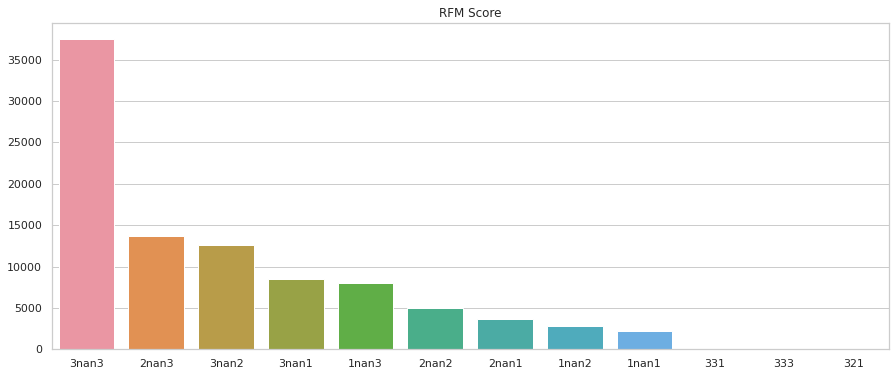

In [273]:
sns.barplot(x=df_RFM['RFM_Score'].value_counts().index, y=df_RFM['RFM_Score'].value_counts().values).set(title='RFM Score')


Сегменты   
RFM=111 recency от 0 до 64 дней, frequency от 1 до 0.014 покупок в день, monetary от 4999 до 1479562 потраченных денег  
RFM=211 recency от 65 до 169 дней, frequency от 1 до 0.014 покупок в день, monetary от 4999 до 1479562 потраченных денег  
RFM=221 recency от 65 до 169 дней, frequency от 0.013 до 0.006 покупок в день, monetary от 4999 до 1479562 потраченных денег  
RFM=212 recency от 65 до 169 дней, frequency от 1 до 0.014 покупок в день, monetary от 2115 до 4998 потраченных денег  
RFM=222 recency от 65 до 169 дней, frequency от 0.013 до 0.006 покупок в день, monetary от 2115 до 4998 потраченных денег  
RFM=122 recency от 0 до 64 дней, frequency от 0.013 до 0.006 покупок в день, monetary от 2115 до 4998 потраченных денег  
RFM=322 recency от 170 до 603 дней, frequency от 0.013 до 0.006 покупок в день, monetary от 2115 до 4998 потраченных денег  
RFM=332 recency от 170 до 603 дней, frequency от 0.006 до 0 покупок в день, monetary от 2115 до 4998 потраченных денег  
RFM=333 recency от 170 до 603 дней, frequency от 0.006 до 0 покупок в день, monetary от 0 до 2114 потраченных денег  
RFM=222 recency от 65 до 169 дней, frequency от 0.013 до 0.006 покупок в день, monetary от 0 до 2114 потраченных денег  
RFM=331 recency от 170 до 603 дней, frequency от 0.006 до 0 покупок в день, monetary от 4999 до 1479562 потраченных денег  
RFM=113 recency от 0 до 64 дней, frequency от 1 до 0.014 покупок в день, monetary от 0 до 2115 потраченных денег  
RFM=112 recency от 0 до 64 дней, frequency от 1 до 0.014 покупок в день, monetary от 2115 до 4998 потраченных денег  
RFM=213 recency от 65 до 169 дней, frequency от 1 до 0.014 покупок в день, monetary от 0 до 2114 потраченных денег  
RFM=233 recency от 65 до 169 дней, frequency от 0.006 до 0 покупок в день, monetary от 0 до 2114 потраченных денег  
RFM=323 recency от 170 до 603 дней, frequency от 0.013 до 0.006 покупок в день, monetary от 0 до 2114 потраченных денег  
RFM=321 recency от 170 до 603 дней, frequency от 0.013 до 0.006 покупок в день, monetary от 4999 до 1479562 потраченных денег  
RFM=232 recency от 65 до 169 дней, frequency от 0.006 до 0 покупок в день, monetary от 2115 до 4998 потраченных денег  
RFM=231 recency от 65 до 169 дней, frequency от 0.006 до 0 покупок в день, monetary от 4999 до 1479562 потраченных денег  
RFM=121 recency от 0 до 64 дней, frequency от 0.013 до 0.006 покупок в день, monetary от 49979 до 1479562 потраченных денег  
RFM=123 recency от 0 до 64 дней, frequency от 0.013 до 0.006 покупок в день, monetary от 0 до 2115 потраченных денег  
RFM=132 recency от 0 до 64 дней, frequency от 0.006 до 0 покупок в день, monetary от 2115 до 4998 потраченных денег  
RFM=131 recency от 0 до 64 дней, frequency от 0.006 до 0 покупок в день, monetary от 4999 до 1479562 потраченных денег  
RFM=133 recency от 0 до 64 дней, frequency от 0.006 до 0 покупок в день, monetary от 0 до 2114 потраченных денег  
RFM=311 recency от 170 до 603 дней, frequency от 1 до 0.014 покупок в день, monetary от 4999 до 1479562 потраченных денег  
RFM=313 recency от 170 до 603 дней, frequency от 1 до 0.014 покупок в день, monetary от 0 до 2115 потраченных денег  
RFM=312 recency от 170 до 603 дней, frequency от 1 до 0.014 покупок в день, monetary от 2114 до 4998 потраченных денег  
